# CV Project - Face Mask Segmentation

## Project Description

In this hands-on project, the goal is to build a Face Mask Segmentation model which includes building a face detector to locate the position of a face in an image.

## Data Description

**WIDER Face Dataset**

WIDER FACE dataset is a Face Segmentation benchmark dataset, of which images are selected from the publicly available WIDER dataset. This dataset have 32,203 images and 393,703 faces are labeled with a high degree of variability in scale, pose and occulsion as depicted in the sample images. In this project, we are using 409 images and around 1000 faces for ease of computation.

We will be using transfer learning on an already trained model to build our segmenter. We will perform transfer learning on the MobileNet which is already trained to perform image segmentation. We will need to train the last 6-7 layers and freeze the remaining layers to train the model for the face mask segmentation. To be able to train the MobileNet model for face mask segmentation, we will be using the WIDER FACE dataset for various images with a single face and multiple faces. The output of the model is the face mask segmented data which masks the face in an image. We learn to build a face mask segmentation model using Keras supported by Tensorflow.

**Reference**

Aknowledgement for the datasets.

http://mmlab.ie.chuhk.edu.hk/projects/WIDERFace/

MobileNet paper: https://arxiv.org/pdf/1704.04861.pdf

## Objective

In this problem, we use "Transfer Learning" of an Image Segmentation model to detect any object according to the problem in hand.

Here, we are particularly interested in segmenting faces in a given image

## Steps and Task

* Load The dataset given in form .npy format
  * We have already extracted the images from wider face-dataset and added it in the file images.npy. You can directly use this file for this project
  * "images.npy" contains details about the image and its masks, there is no separate CSV file for that
  * There is no separate train and test data given
* Create Features (images) and labels (mask) using that data.
* Load the pre-trained model and weights
* Create a model using the above model
* Define the Dice Coefficient and Loss function
* Compile and fit the model
* Evaluate the model

Upload Python file from the following link:
https://github.com/jimitpatel/AIML/blob/master/googledriveloaddata.py

In [0]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving googledriveloaddata.py to googledriveloaddata.py


In [0]:
!pip install -U -q PyDrive
from googledriveloaddata import DatasetLoader

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

### Change current working directory to project folder (1 mark)

In [0]:
url = "https://drive.google.com/file/d/1rolp8QqyKkvxJwlBAPPGtG2f3JA7hMwk/view?usp=drivesdk"
dataloader = DatasetLoader(url)
dataloader.load_data("images.npy")

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy', encoding='bytes', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [117]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1


### Print the shape of X_train and mask array  (2 marks)

In [120]:
X_train.shape

(409, 224, 224, 3)

In [121]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

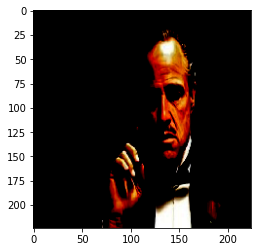

In [122]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

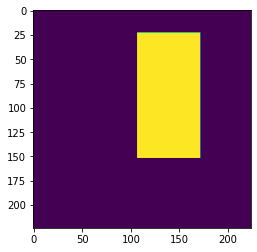

In [123]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3), include_top=False, alpha=1.0, weights='imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    
    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [262]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(True)

# Print summary
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
___________________________________________________________________________________________

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [0]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="val_loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [267]:
from sklearn.model_selection import train_test_split
data_train, data_val, mask_train, mask_val = train_test_split(X_train, masks, test_size=0.15, random_state=20)


model.fit(x=data_train, y=mask_train, validation_data=(data_val, mask_val), epochs=50, batch_size=1, verbose=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/50
347/347 [==============================] - ETA: 0s - loss: 1.4159 - dice_coefficient: 0.4312
Epoch 00001: loss improved from inf to 1.41594, saving model to model-1.42.h5
347/347 [==============================] - 13s 38ms/step - loss: 1.4159 - dice_coefficient: 0.4312 - val_loss: 1.3202 - val_dice_coefficient: 0.4669 - lr: 1.0000e-04
Epoch 2/50
347/347 [==============================] - ETA: 0s - loss: 0.8233 - dice_coefficient: 0.6050
Epoch 00002: loss improved from 1.41594 to 0.82329, saving model to model-0.82.h5
347/347 [==============================] - 13s 37ms/step - loss: 0.8233 - dice_coefficient: 0.6050 - val_loss: 1.0744 - val_dice_coefficient: 0.5118 - lr: 1.0000e-04
Epoch 3/50
347/347 [==============================] - ETA: 0s - loss: 0.6482 - dice_coefficient: 0.6679
Epoch 00003: loss improved from 0.82329 to 0.64817, saving model to model-0.65.h5
347/347 [==============================] - 13s 37ms/step - loss: 0.6482 - dice_coefficient: 0.6679 - val_loss: 0.9

### Evaluate the model

In [268]:
evaluation = model.evaluate(x=X_train, y=masks, batch_size=1, verbose=1, callbacks=[checkpoint, reduce_lr, stop], return_dict=True)
print(evaluation)

409/409 [==============================] - 5s 13ms/step - loss: 0.7497 - dice_coefficient: 0.6602
{'loss': 0.7497474551200867, 'dice_coefficient': 0.6602419018745422}


### Get the predicted mask for a sample image   (5 marks)

### Impose the mask on the image (5 marks)

In [0]:
def predict_image(unscaled_img):

  unscaled = unscaled_img
  image = cv2.resize(unscaled, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
  feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

  pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

  image2 = image
  image2[:,:,0] = pred_mask*image[:,:,0]
  image2[:,:,1] = pred_mask*image[:,:,1]
  image2[:,:,2] = pred_mask*image[:,:,2]

  out_image = image2

  fig = pyplot.figure(figsize=(15,15))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.title.set_text("Original")
  pyplot.imshow(unscaled_img)
  ax2 = fig.add_subplot(1, 3, 2)
  ax2.title.set_text("Predicted Mask")
  pyplot.imshow(pred_mask)
  ax3 = fig.add_subplot(1, 3, 3)
  ax3.title.set_text("Output")
  pyplot.imshow(out_image)

  pyplot.show()

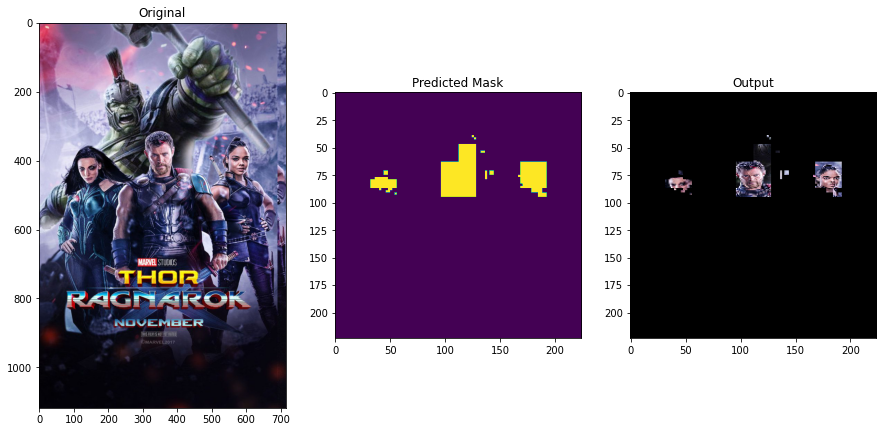

In [277]:
predict_image(data[32][0])

In [0]:
def predict_from_file(filename):
  predict_image(cv2.imread(filename))

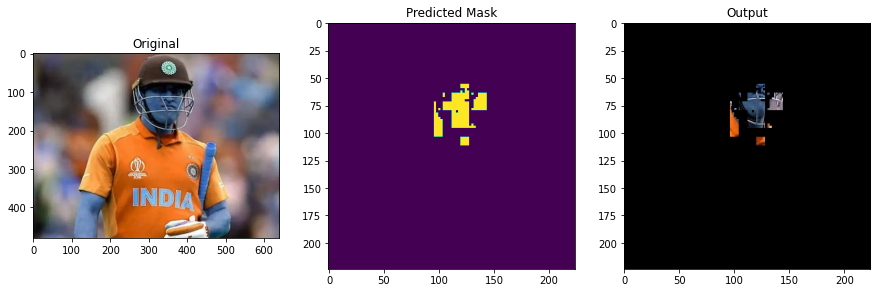

In [279]:
predict_from_file("ejaq579g_ms-dhoni-afp_625x300_10_June_20.webp")

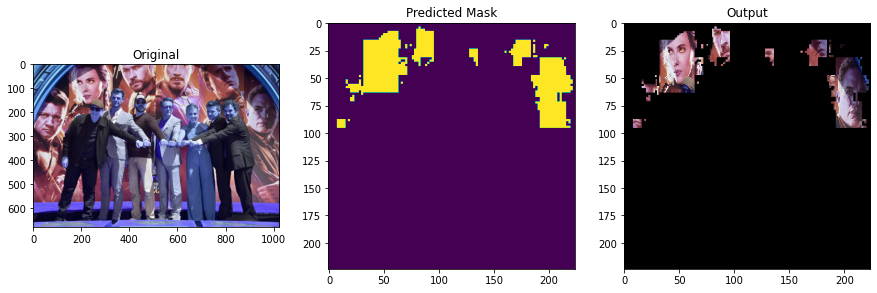

In [281]:
predict_from_file("endgame.jpg")

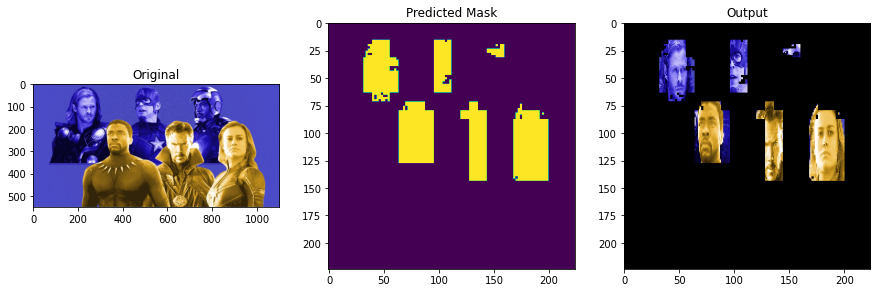

In [282]:
predict_from_file("endgame2.jpg")